In [100]:
import glob
import os
import pathlib

import cv2
import pydicom
from matplotlib import pyplot as plt
import numpy as np

import vedo


DATA_PATH = "./data/SAMPLE_001/"

dcms = glob.glob(os.path.join(DATA_PATH, "*.dcm"))
cts = list(filter(lambda x: "CT." in x, dcms))

study_times = []

for c in cts:
    dcm = pydicom.dcmread(c)
    study_times.append(dcm.StudyInstanceUID)
    


print(np.unique(study_times))

['1.2.246.352.221.50713064671828803341413122295358097594'
 '1.2.246.352.221.51874220960708934298512785694221890450'
 '1.2.246.352.221.570003398414459193616950218784466668220']


In [103]:
study_images = {k: {} for k in np.unique(study_times)}
shapes = []
for c in cts:
    dcm = pydicom.dcmread(c)
    if np.array(dcm.pixel_array).shape == (512, 512):
        series_uid = dcm.SeriesInstanceUID
        if series_uid not in study_images[dcm.StudyInstanceUID]:
            study_images[dcm.StudyInstanceUID][series_uid] = []
        print(f"Appending to study time {dcm.StudyInstanceUID}, image shape {np.array(dcm.pixel_array).shape}")
        study_images[dcm.StudyInstanceUID][series_uid].append((np.array(dcm.pixel_array), dcm.ImagePositionPatient[2]))
        print("Appending")

print(np.unique(shapes, axis=0))


Appending to study time 1.2.246.352.221.570003398414459193616950218784466668220, image shape (512, 512)
Appending
Appending to study time 1.2.246.352.221.51874220960708934298512785694221890450, image shape (512, 512)
Appending
Appending to study time 1.2.246.352.221.570003398414459193616950218784466668220, image shape (512, 512)
Appending
Appending to study time 1.2.246.352.221.51874220960708934298512785694221890450, image shape (512, 512)
Appending
Appending to study time 1.2.246.352.221.51874220960708934298512785694221890450, image shape (512, 512)
Appending
Appending to study time 1.2.246.352.221.51874220960708934298512785694221890450, image shape (512, 512)
Appending
Appending to study time 1.2.246.352.221.51874220960708934298512785694221890450, image shape (512, 512)
Appending
Appending to study time 1.2.246.352.221.51874220960708934298512785694221890450, image shape (512, 512)
Appending
Appending to study time 1.2.246.352.221.51874220960708934298512785694221890450, image shape (5

In [166]:
idx = 0
import h5py


for k, v in study_images.items():
    for k2, v2 in v.items():
        volume = sorted(v2, key=lambda x: x[1])
        volume = np.stack([cv2.resize(x[0], (512, 512)) for x in volume])[:1024, ...]
        np.save(f"volume_{idx}.npy", volume)
        idx += 1
        print(volume.shape)
study_images["095952.21"] = sorted(study_images["095952.21"], key=lambda x: x[1])
volume = np.stack([cv2.resize(x[0], (512, 512)) for x in study_images["095952.21"]])[:1024, ...]
print(volume.shape)
np.save("volume.npy", volume)
    

(401, 512, 512)
(171, 512, 512)
(88, 512, 512)
(93, 512, 512)
(93, 512, 512)
(171, 512, 512)
(93, 512, 512)
(93, 512, 512)
(171, 512, 512)
(88, 512, 512)
(93, 512, 512)
(93, 512, 512)
(93, 512, 512)
(93, 512, 512)
(93, 512, 512)
(93, 512, 512)
(88, 512, 512)
(171, 512, 512)
(93, 512, 512)
(93, 512, 512)
(88, 512, 512)
(93, 512, 512)
(93, 512, 512)
(93, 512, 512)
(93, 512, 512)
(93, 512, 512)
(93, 512, 512)
(93, 512, 512)
(196, 512, 512)
(93, 512, 512)
(93, 512, 512)
(196, 512, 512)
(196, 512, 512)
(88, 512, 512)
(196, 512, 512)
(93, 512, 512)
(88, 512, 512)
(93, 512, 512)
(93, 512, 512)
(88, 512, 512)
(93, 512, 512)
(93, 512, 512)
(93, 512, 512)
(93, 512, 512)


KeyError: '095952.21'

In [105]:
for k, v in study_images.items():
    for k2, v2 in v.items():
        print(len(v2))


401
171
88
93
93
171
93
93
171
88
93
93
93
93
93
93
88
171
93
93
88
93
93
93
93
93
93
93
196
93
93
196
196
88
196
93
88
93
93
88
93
93
93
93


In [156]:
dcms = glob.glob(os.path.join(DATA_PATH, "*.dcm"))
rss = list(filter(lambda x: "RS." in x, dcms))

study_times = []

for c in rss[1:]:
    dcm = pydicom.dcmread(c)
    print(dcm)
    break

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 190
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: RT Structure Set Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.246.352.221.525367444293291860214863761667205101460
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.160.3
(0002,0013) Implementation Version Name         SH: 'DCIE 2.2'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 192'
(0008,0012) Instance Creation Date              DA: '20250408'
(0008,0013) Instance Creation Time              TM: '105943'
(0008,0016) SOP Class UID                       UI: RT Structure Set Storage
(0008,0018) SOP Instance UID                    UI: 1.2.246.352.221.525367444293291860214863761667205101460
(00

[(0008,1150) Referenced SOP Class UID            UI: CT Image Storage
(0008,1155) Referenced SOP Instance UID         UI: 1.2.246.352.221.48876558059393489415574103902263397790]
[(0008,1150) Referenced SOP Class UID            UI: CT Image Storage
(0008,1155) Referenced SOP Instance UID         UI: 1.2.246.352.221.48876558059393489415574103902263397790]
[(0008,1150) Referenced SOP Class UID            UI: CT Image Storage
(0008,1155) Referenced SOP Instance UID         UI: 1.2.246.352.221.48876558059393489415574103902263397790]
[(0008,1150) Referenced SOP Class UID            UI: CT Image Storage
(0008,1155) Referenced SOP Instance UID         UI: 1.2.246.352.221.48876558059393489415574103902263397790]
[(0008,1150) Referenced SOP Class UID            UI: CT Image Storage
(0008,1155) Referenced SOP Instance UID         UI: 1.2.246.352.221.48876558059393489415574103902263397790]
[(0008,1150) Referenced SOP Class UID            UI: CT Image Storage
(0008,1155) Referenced SOP Instance UID 

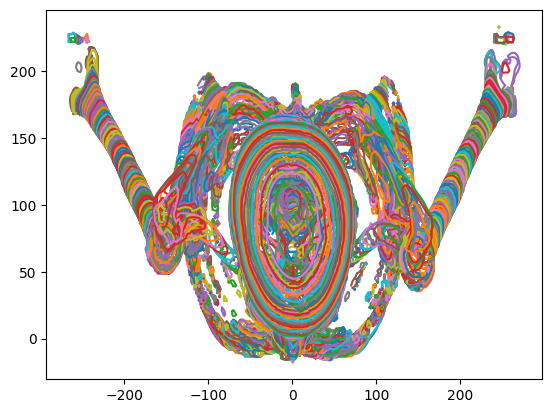

In [165]:
image_shape = (512, 512)

plt.figure()
for d in dcm.ROIContourSequence[8].ContourSequence:
    print(d.ContourImageSequence)
    data = np.array(d.ContourData).reshape(-1, 3)
    plt.plot(data[:, 0], data[:, 1])
plt.show()
